<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Experiments/Food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Apr 21 00:01:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

# Working Food101 Dataset

In [4]:
# Get helper functions file
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

--2021-04-21 00:01:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-04-21 00:01:37 (79.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

# List all the available datasets in tensorflow datasets
datasets_list = tfds.list_builders()

# Is our food101 dataset available? 
print('food101' in datasets_list)

True


In [6]:
# Loading the food101 data for our use 
(train_data , test_data) , ds_info = tfds.load(name = 'food101' , 
                                               split = ['train' , 'validation'] , 
                                               shuffle_files = True , 
                                               as_supervised = True, # data in tuple format (image , label)
                                                with_info = True) 

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete2JZZ1R/food101-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete2JZZ1R/food101-validation.tfrecord


Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [7]:
# Features of Food101 TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [8]:
# Getting the class names 
class_names = ds_info.features['label'].names
print(class_names[:10]) # First 10 

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [9]:
# How many class names are there? 
len(class_names)

101

In [10]:
# Take one sample from our train_data 
train_one_sample = train_data.take(1) # (image tensor , label)

In [11]:
# What does one sample of our training data look like?
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [12]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 25
  Class name (str form): club_sandwich
        


In [13]:
# What does an image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[135, 156, 175],
        [125, 148, 166],
        [114, 136, 159],
        ...,
        [ 26,   5,  12],
        [ 26,   3,  11],
        [ 27,   4,  12]],

       [[128, 150, 171],
        [115, 140, 160],
        [102, 127, 149],
        ...,
        [ 28,   7,  14],
        [ 29,   6,  14],
        [ 30,   7,  15]],

       [[112, 139, 160],
        [ 99, 127, 148],
        [ 87, 115, 137],
        ...,
        [ 29,   6,  16],
        [ 31,   5,  16],
        [ 32,   6,  17]],

       ...,

       [[ 48,  47,  53],
        [ 53,  52,  58],
        [ 52,  51,  59],
        ...,
        [111,  99,  99],
        [108,  98,  97],
        [106,  96,  97]],

       [[ 44,  45,  47],
        [ 48,  49,  51],
        [ 46,  47,  51],
        ...,
        [108,  96,  98],
        [105,  94,  98],
        [102,  93,  96]],

       [[ 40,  42,  41],
        [ 45,  47,  46],
        [ 44,  45,  49],
        ...,
        [105,  95,  9

In [14]:
# What are the min and max values?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

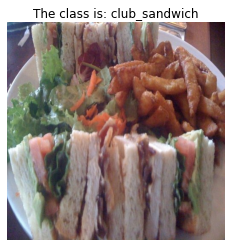

In [15]:
# Plotting an image tensor 
import matplotlib.pyplot as plt 
plt.imshow(image)
plt.title(f'The class is: {class_names[label.numpy()]}')
plt.axis(False)

In [16]:
# Data type our tensor from tfds 
image.dtype

tf.uint8

In [17]:
# Making a preprocess function 
def preprocess_img(image , label , img_shape = 224):
  '''
  Converts image datatypes from 'uint8' to 'float32' 
  Reshapes image to (img_shape , img_shape , color_channels)
  '''
  image = tf.image.resize(image , size = [img_shape , img_shape]) # reshapes to [224 , 224]
  return tf.cast(image , tf.float32) , label

In [18]:
# Checking the output of the preprocessed image and normal image
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[135 156 175]
  [125 148 166]
  [114 136 159]
  ...
  [ 26   5  12]
  [ 26   3  11]
  [ 27   4  12]]

 [[128 150 171]
  [115 140 160]
  [102 127 149]
  ...
  [ 28   7  14]
  [ 29   6  14]
  [ 30   7  15]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[122.83163   146.17346   165.81633  ]
  [ 95.07653   122.122444  144.47958  ]
  [ 72.5051    106.994896  134.34694  ]
  ...
  [ 20.714308    2.3570995   3.9285717]
  [ 27.285715    6.285714   13.285714 ]
  [ 28.28575     5.2857494  13.285749 ]]

 [[ 88.65305   119.41326   140.41327  ]
  [ 74.59694   108.30102   133.02042  ]
  [ 75.2551    112.57143   141.91325  ]
  ...
  [ 26.857143    6.285671   11.040798 ]
  [ 30.061235    6.86222    16.795908 ]
  [ 31.688843    5.688843   16.688843 ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


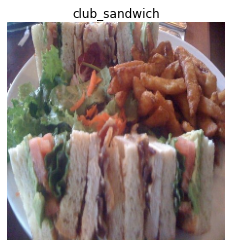

In [19]:
# We can still plot our preprocessed image as long as we 
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

In [20]:
# Map the preprocessing function to our training data (paralellize)
train_data = train_data.map(map_func= preprocess_img , num_parallel_calls= tf.data.AUTOTUNE)

# Shuffle train data and turn into batches and prefetch it (load the data faster)
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

# Mapping the preprocessing function on the test data 
test_data = test_data.map(map_func = preprocess_img , num_parallel_calls= tf.data.AUTOTUNE)

# Creating batches of our test data and enabling prefetch 
test_data = test_data.batch(batch_size= 32).prefetch(tf.data.AUTOTUNE) # Use the max processor for us

In [21]:
# How does the data looks like? 
train_data , test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [22]:
# Gonna create two modelcheckpoint callback 

# Defining the filepaths 
checkpoint_path_1 = 'model_checkpoint_1/cp.ckpt'
checkpoint_path_2 = 'model_checkpoint_2/cp.ckpt'

# Creating our callbacks 
model_checkpoint_1 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_1 , 
                                                        monitor = 'val_accuracy' , 
                                                        save_best_only = True , 
                                                        save_weights_only = True)

model_checkpoint_2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_2 , 
                                                        monitor = 'val_accuracy' , 
                                                        save_best_only = True , 
                                                        save_weights_only = True)

In [23]:
# Creating EarlyStopping callback 

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy' , 
                                                  min_delta = 0.5 , 
                                                  patience = 2 , 
                                                  restore_best_weights = True , 
                                                  verbose = 1)

In [31]:
preprocessing.RandomCrop??

In [80]:
# Creating a augmentation layer 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = Sequential([
  preprocessing.RandomRotation(0.3), 
  #preprocessing.RandomCrop(height= 0.1 , width= 0.2),
  #preprocessing.RandomFlip('horizontal'), # randomly flip images on horizontal edge
  #preprocessing.RandomHeight(0.3), # randomly adjust the height of an image by a specific amount
  #preprocessing.RandomWidth(0.3), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.3)
] , name = 'augmentation_layer')

In [81]:
# Turn on mixed precision 
from tensorflow.keras import mixed_precision 
mixed_precision.set_global_policy(policy = 'mixed_float16')

In [100]:
# Creating a function which would return us a model 
def create_model(num_classes , input_shape = (224 , 224, 3)):

  # Create the input layer 
  input_shape = input_shape
  inputs = layers.Input(shape = input_shape , name = 'Input_layer')  

  # Creating a base model of EfficientNetBo 
  base_model = tf.keras.applications.EfficientNetB2(include_top= False)
  # Freeze base model layer (all layers)
  base_model.trainable = False


  # Starting to construct a functional model 
  x = data_augmentation(inputs)
  x = base_model(x , training = False)  

  # Pooling layer
  x = layers.GlobalAveragePooling2D(name = 'pooling_2d_layer')(x)

  #x = BatchNormalization()(x)

  # Our output number of classes 
  x = layers.Dense(num_classes)(x)

  # Adding a Dropout layer
  x = layers.Dropout(0.3)(x)

  # Separate activation layer (since we're using mixed precision)
  outputs = layers.Activation('softmax' , dtype = tf.float32 , name = 'output_layer')(x)

  # Packing into a model 
  model = tf.keras.Model(inputs , outputs)

  return model 

In [101]:
# Creating a ReduceLRonPlateua

reduce_lr_plat = tf.keras.callbacks.ReduceLROnPlateau(monitor= 'val_accuracy' , 
                                                      patience = 1 , 
                                                      mode = 'max' , 
                                                      min_delta = 0.8 , 
                                                      min_lr = 0.001 , 
                                                      factor = 0.01)

In [85]:
# Using our function and creating a model 
model = create_model(num_classes= len(class_names))

# Compile the model 
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

16711680/16705208 [==============================] - 0s 0us/step


In [86]:
# Getting the summary of the model 
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
augmentation_layer (Sequenti (None, 224, 224, 3)       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
pooling_2d_layer (GlobalAver (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 101)               129381    
_________________________________________________________________
dropout_2 (Dropout)          (None, 101)               0         
_________________________________________________________________
output_layer (Activation)    (None, 101)               0   

In [88]:
def feature_extractor_trainer(train_data , 
                              model,
                              test_data , test_pct = 0.15 , initial_epochs = 3, 
                              callbacks = [] ):
  history = model.fit(train_data , 
                      epochs = initial_epochs , 
                      validation_data = test_data , 
                      validation_steps = int(test_pct * len(test_data)) , 
                      callbacks = callbacks)
  return history

In [90]:
# Using our function to train our feature extractor model 
history_feature_model_1 = feature_extractor_trainer(train_data= train_data , 
                                                    test_data = test_data  , 
                                                    model = model)

Epoch 1/3
2368/2368 [==============================] - 179s 72ms/step - loss: 3.8207 - accuracy: 0.1954 - val_loss: 2.0287 - val_accuracy: 0.5948
Epoch 2/3
2368/2368 [==============================] - 169s 71ms/step - loss: 3.3156 - accuracy: 0.2917 - val_loss: 1.8507 - val_accuracy: 0.6202
Epoch 3/3
2368/2368 [==============================] - 171s 71ms/step - loss: 3.2510 - accuracy: 0.3064 - val_loss: 1.7709 - val_accuracy: 0.6279


In [91]:
# Evaluating on the whole test data 
feature_extractor_model_1 = model.evaluate(test_data)

790/790 [==============================] - 56s 70ms/step - loss: 1.7875 - accuracy: 0.6276


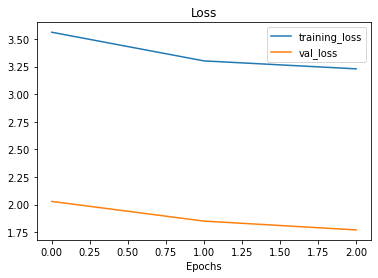

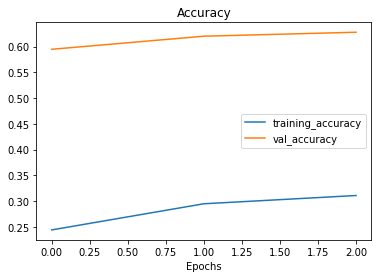

In [92]:
# Plotting the loss curves 
plot_loss_curves(history_feature_model_1)

In [93]:
# Let's create a fine tune model 
def fine_tune_trainer(train_data , 
                      test_data ,feature_extract_model  , feature_extract_history, callbacks,
                      num_fine_tune_epochs = 5 , initial_epochs = 3 ):
  
  fine_tune_epochs = initial_epochs + num_fine_tune_epochs
  history = feature_extract_model.fit(train_data , 
                                      epochs = fine_tune_epochs , 
                                      validation_data = test_data , 
                                      validation_steps = int(0.15 * len(test_data)) , 
                                      initial_epoch = feature_extract_history.epoch[-1] , 
                                      callbacks = callbacks)

  return history

In [94]:
# Unfreeze all the layers in the base model 
model.layers[2].trainable = True 

# Refreeze every layers except for the last 5 
for layer in model.layers[2].layers[:-5]:
  layer.trainable = False

In [95]:
# Check which layers are trainable (last 5 layers should be True)
for layer_num , layer in enumerate(model.layers[2].layers):
  print(layer_num , layer.name , layer.dtype_policy ,  layer.trainable)

0 input_8 <Policy "float32"> False
1 rescaling_7 <Policy "mixed_float16"> False
2 normalization_7 <Policy "float32"> False
3 stem_conv_pad <Policy "mixed_float16"> False
4 stem_conv <Policy "mixed_float16"> False
5 stem_bn <Policy "mixed_float16"> False
6 stem_activation <Policy "mixed_float16"> False
7 block1a_dwconv <Policy "mixed_float16"> False
8 block1a_bn <Policy "mixed_float16"> False
9 block1a_activation <Policy "mixed_float16"> False
10 block1a_se_squeeze <Policy "mixed_float16"> False
11 block1a_se_reshape <Policy "mixed_float16"> False
12 block1a_se_reduce <Policy "mixed_float16"> False
13 block1a_se_expand <Policy "mixed_float16"> False
14 block1a_se_excite <Policy "mixed_float16"> False
15 block1a_project_conv <Policy "mixed_float16"> False
16 block1a_project_bn <Policy "mixed_float16"> False
17 block2a_expand_conv <Policy "mixed_float16"> False
18 block2a_expand_bn <Policy "mixed_float16"> False
19 block2a_expand_activation <Policy "mixed_float16"> False
20 block2a_dwconv

In [96]:
# Compiling the model 
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001) , 
              metrics = ['accuracy'])

In [97]:
# Fine tuning our model 
history_fine_tune_model_1 = fine_tune_trainer(train_data , 
                                              test_data , 
                                              model , 
                                              history_feature_model_1 , 
                                              num_fine_tune_epochs = 25 , 
                                              callbacks = [reduce_lr_plat])

Epoch 3/28
2368/2368 [==============================] - 188s 76ms/step - loss: 3.1384 - accuracy: 0.3271 - val_loss: 1.6197 - val_accuracy: 0.6838
Epoch 4/28
2368/2368 [==============================] - 171s 72ms/step - loss: 3.0397 - accuracy: 0.3443 - val_loss: 1.5743 - val_accuracy: 0.6872
Epoch 5/28
2368/2368 [==============================] - 168s 70ms/step - loss: 2.9980 - accuracy: 0.3498 - val_loss: 1.5421 - val_accuracy: 0.6954
Epoch 6/28
2368/2368 [==============================] - 167s 70ms/step - loss: 2.9584 - accuracy: 0.3582 - val_loss: 1.5129 - val_accuracy: 0.6973
Epoch 7/28
2368/2368 [==============================] - 167s 70ms/step - loss: 2.9280 - accuracy: 0.3641 - val_loss: 1.5035 - val_accuracy: 0.7026
Epoch 8/28
2368/2368 [==============================] - 169s 71ms/step - loss: 2.8910 - accuracy: 0.3709 - val_loss: 1.4646 - val_accuracy: 0.7087
Epoch 9/28
2368/2368 [==============================] - 169s 71ms/step - loss: 2.8720 - accuracy: 0.3736 - val_loss: 1

In [98]:
# Evaluating on the full dataset 
full_result_model_1 = model.evaluate(test_data)

790/790 [==============================] - 55s 70ms/step - loss: 1.2678 - accuracy: 0.7262


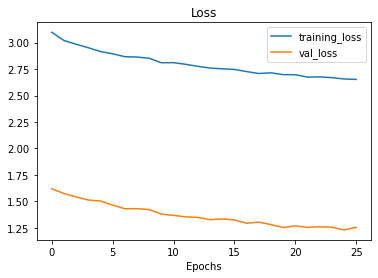

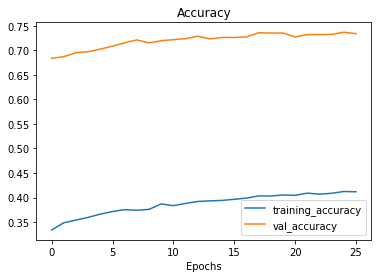

In [99]:
# Plotting the loss curves 
plot_loss_curves(history_fine_tune_model_1)

Holaa! The model was doing fine but the `factor` wasn't good enough to lower the learning rate. And we used EfficientNetB0 here. 

Next will try to upgrade our model and add one layer of data augmentation (not sure) and decrease the factor a bit. 

In [ ]:
tf.keras.callbacks.ReduceLROnPlateau??

In [ ]:
# Creating a learning rate scheduler 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (0.75** np.floor(epoch / 2)))
lr_scheduler_1 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
def create_modelcheckpoint_callback(folder_name):
  checkpoint_path = f'{folder_name}/cp.ckpt'

  # Creating our callbacks 
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_1 , 
                                                        monitor = 'val_accuracy' , 
                                                        save_best_only = True , 
                                                        save_weights_only = True)

Using a EfficientNetB2 now and With fewer Augmentation layers

In [103]:
# Creating a model 
model_2 = create_model(num_classes= len(class_names))

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Getting the summary of our model 
model_2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
augmentation_layer (Sequenti (None, 224, 224, 3)       0         
_________________________________________________________________
efficientnetb2 (Functional)  (None, None, None, 1408)  7768569   
_________________________________________________________________
pooling_2d_layer (GlobalAver (None, 1408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 101)               142309    
_________________________________________________________________
dropout_4 (Dropout)          (None, 101)               0         
_________________________________________________________________
output_layer (Activation)    (None, 101)               0   

In [104]:
for layer in model_2.layers:
  print(layer , layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1577b12090> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f15ea2f9e90> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f1598c48a10> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f157705e490> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f15774eaa90> True
<tensorflow.python.keras.layers.core.Dropout object at 0x7f1577062190> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f1577494810> True


In [ ]:

tf.config.run_functions_eagerly(True)

In [106]:
# Fitting our feature extractor model 
history_feature_model_2 = feature_extractor_trainer(train_data , 
                                                    model_2, 
                                                    test_data , 
                                                    initial_epochs = 4)

Epoch 1/4
2368/2368 [==============================] - 191s 76ms/step - loss: 3.3721 - accuracy: 0.2712 - val_loss: 1.6922 - val_accuracy: 0.6155
Epoch 2/4
2368/2368 [==============================] - 181s 75ms/step - loss: 2.7280 - accuracy: 0.3951 - val_loss: 1.5318 - val_accuracy: 0.6382
Epoch 3/4
2368/2368 [==============================] - 176s 74ms/step - loss: 2.6372 - accuracy: 0.4115 - val_loss: 1.4794 - val_accuracy: 0.6528
Epoch 4/4
2368/2368 [==============================] - 181s 76ms/step - loss: 2.5852 - accuracy: 0.4234 - val_loss: 1.4309 - val_accuracy: 0.6592


In [107]:
# Evaluating on the whole test data 
feature_results_model_2 = model_2.evaluate(test_data)

790/790 [==============================] - 57s 72ms/step - loss: 1.4399 - accuracy: 0.6559


In [108]:
for layer in model_2.layers:
  print(layer.name , layer.trainable)

Input_layer True
augmentation_layer True
efficientnetb2 False
pooling_2d_layer True
dense_5 True
dropout_4 True
output_layer True


In [109]:
# Unfreeze all the layers in the base model 
model_2.layers[2].trainable = True 

In [110]:

# Refreeze every layers except for the last 5 
for layer in model_2.layers[2].layers[:-6]:
  layer.trainable = False

In [111]:
for layer in model_2.layers[2].layers:
  print(layer.name , layer.trainable , layer.dtype_policy)

input_10 False <Policy "float32">
rescaling_9 False <Policy "mixed_float16">
normalization_9 False <Policy "float32">
stem_conv_pad False <Policy "mixed_float16">
stem_conv False <Policy "mixed_float16">
stem_bn False <Policy "mixed_float16">
stem_activation False <Policy "mixed_float16">
block1a_dwconv False <Policy "mixed_float16">
block1a_bn False <Policy "mixed_float16">
block1a_activation False <Policy "mixed_float16">
block1a_se_squeeze False <Policy "mixed_float16">
block1a_se_reshape False <Policy "mixed_float16">
block1a_se_reduce False <Policy "mixed_float16">
block1a_se_expand False <Policy "mixed_float16">
block1a_se_excite False <Policy "mixed_float16">
block1a_project_conv False <Policy "mixed_float16">
block1a_project_bn False <Policy "mixed_float16">
block1b_dwconv False <Policy "mixed_float16">
block1b_bn False <Policy "mixed_float16">
block1b_activation False <Policy "mixed_float16">
block1b_se_squeeze False <Policy "mixed_float16">
block1b_se_reshape False <Policy "m

In [ ]:
history_fine_tune_model_2 = fine_tune_trainer(train_data , 
                                              test_data , 
                                              model_2 , 
                                              history_feature_model_2 , 
                                              num_fine_tune_epochs = 25 , 
                                              callbacks = [reduce_lr_plat])

Epoch 4/28
2368/2368 [==============================] - 182s 76ms/step - loss: 2.5624 - accuracy: 0.4298 - val_loss: 1.4117 - val_accuracy: 0.6613
Epoch 5/28
2368/2368 [==============================] - 179s 75ms/step - loss: 2.5290 - accuracy: 0.4337 - val_loss: 1.3842 - val_accuracy: 0.6597
Epoch 6/28
2368/2368 [==============================] - 180s 75ms/step - loss: 2.5130 - accuracy: 0.4391 - val_loss: 1.3753 - val_accuracy: 0.6660
Epoch 7/28
2368/2368 [==============================] - 178s 75ms/step - loss: 2.4920 - accuracy: 0.4408 - val_loss: 1.3476 - val_accuracy: 0.6690
Epoch 8/28
2368/2368 [==============================] - 178s 74ms/step - loss: 2.4976 - accuracy: 0.4414 - val_loss: 1.3541 - val_accuracy: 0.6692
Epoch 9/28
2368/2368 [==============================] - 178s 75ms/step - loss: 2.4825 - accuracy: 0.4446 - val_loss: 1.3428 - val_accuracy: 0.6713
Epoch 10/28
2368/2368 [==============================] - 179s 75ms/step - loss: 2.4649 - accuracy: 0.4484 - val_loss: 

In [ ]:
# Evaluate on the full test data 
results_fine_tuned_model_2 = model_2.evaluate(test_data)

790/790 [==============================] - 45s 57ms/step - loss: 1.2959 - accuracy: 0.6548
